<a href="https://colab.research.google.com/github/thecodemancer/san_marcos_presentations/blob/main/an%C3%A1lisis_de_los_servicios_de_streaming_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los servicios de Streaming con Python

<center>
<img src="https://raw.githubusercontent.com/thecodemancer/san_marcos_presentations/main/img/tcl-Best-Streaming-Apps-2022.webp" />
</center>

## Setup

Instalamos librerías necesarias

In [64]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

Realizamos los siguientes ajustes cosméticos donde ```display.max_columns``` es para que pandas muestre todas las columnas en el output. ```display.float_format``` es para que en caso tengamos números con decimales, estos se muestren con 3 cifras decimales.

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Carga del Dataset
Cargamos el dataset a memoria en forma de DataFrame.

In [66]:
dataset_url="https://raw.githubusercontent.com/thecodemancer/san_marcos_presentations/main/datasets/streaming_shows.csv"
streaming_shows = pd.read_csv(filepath_or_buffer=dataset_url, header=0, sep=',', quotechar='"')

## Análisis Exploratorio de Datos

Exploramos el dataset. Utilizamos el método ```head(n)``` para dar un vistazo a las **primeras** ```n``` filas.

In [67]:
streaming_shows.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1
6,6,7,Peaky Blinders,2013,18+,8.8/10,93/100,1,0,0,0,1
7,7,8,The Walking Dead,2010,18+,8.2/10,93/100,1,0,0,0,1
8,8,9,Black Mirror,2011,18+,8.8/10,92/100,1,0,0,0,1
9,9,10,The Queen's Gambit,2020,18+,8.6/10,92/100,1,0,0,0,1


La forma (*shape*) nos indica el número de filas y columnas en el dataset.

In [68]:
streaming_shows.shape

(5368, 12)

Nos interesa conocer si tenemos datos nulos en el dataset.

In [69]:
streaming_shows.isna()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,False,False,False,False,True,True,False,False,False,False,False,False
5364,False,False,False,False,True,True,False,False,False,False,False,False
5365,False,False,False,False,True,True,False,False,False,False,False,False
5366,False,False,False,False,True,True,False,False,False,False,False,False


Utilizamos el método ```tail(n)``` para dar un vistazo a las **últimas** ```n``` filas.

In [70]:
streaming_shows.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1
5367,5367,5717,Fearless Adventures with Jack Randall,2018,NaN,NaN,10/100,0,0,0,1,1


Con la siguiente técnica podemos conocer **qué columnas** contienen valores nulos y **cuántos son**.

In [71]:
streaming_shows.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [72]:
streaming_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


## Preparación de Datos

- Debemos trabajar solo con filas únicas.
- Para las calificaciones IMDb y Rotten Tomatoes debemos convertir las columnas a numéricas.

In [73]:
streaming_shows.drop_duplicates(subset='Title', keep='first', inplace=True)

In [74]:
streaming_shows['IMDb'] = streaming_shows['IMDb'].astype('float')

ValueError: ignored

In [75]:
streaming_shows['IMDb']

0       9.4/10
1       8.7/10
2       9.0/10
3       8.8/10
4       8.8/10
         ...  
5363       NaN
5364       NaN
5365       NaN
5366       NaN
5367       NaN
Name: IMDb, Length: 5368, dtype: object

In [76]:
spplited = streaming_shows['IMDb'].str.split("/", expand = True)
numerador = spplited[0]
denominador = spplited[1]

In [77]:
numerador

0       9.4
1       8.7
2       9.0
3       8.8
4       8.8
       ... 
5363    NaN
5364    NaN
5365    NaN
5366    NaN
5367    NaN
Name: 0, Length: 5368, dtype: object

In [78]:
denominador

0        10
1        10
2        10
3        10
4        10
       ... 
5363    NaN
5364    NaN
5365    NaN
5366    NaN
5367    NaN
Name: 1, Length: 5368, dtype: object

In [79]:
streaming_shows['IMDb_new'] = numerador.astype("float") / denominador.astype("float")
streaming_shows['IMDb_new'].head()

0   0.940
1   0.870
2   0.900
3   0.880
4   0.880
Name: IMDb_new, dtype: float64

In [80]:
streaming_shows['IMDb_new'].tail()

5363   NaN
5364   NaN
5365   NaN
5366   NaN
5367   NaN
Name: IMDb_new, dtype: float64

In [81]:
spplited = streaming_shows["Rotten Tomatoes"].str.split("/", expand = True)
numerador = spplited[0]
denominador = spplited[1]
streaming_shows['Rotten Tomatoes_new'] = numerador.astype("float") / denominador.astype("float")
streaming_shows['Rotten Tomatoes_new'].head()

0   1.000
1   0.960
2   0.950
3   0.940
4   0.930
Name: Rotten Tomatoes_new, dtype: float64

Creamos otro DataFrame pero esta vez con los servicios de streaming en una sola columna.

In [82]:
streaming_shows_long=pd.melt(
                             streaming_shows[['Title','Netflix','Hulu','Disney+','Prime Video']],
                             id_vars=['Title'],
                             var_name='StreamingOn',
                             value_name='Present'
                             )
streaming_shows_long.sort_values(by="Title")

,Title,StreamingOn,Present
9829,"#MeToo, Now What?",Hulu,0
4461,"#MeToo, Now What?",Netflix,0
20565,"#MeToo, Now What?",Prime Video,1
15197,"#MeToo, Now What?",Disney+,0
19472,#ThatsHarassment,Prime Video,1
...,...,...,...
18737,頭文字D First Stage,Prime Video,0
20359,부릉! 부릉! 브루미즈,Prime Video,1
14991,부릉! 부릉! 브루미즈,Disney+,0
9623,부릉! 부릉! 브루미즈,Hulu,0


De todas estas filas, nos quedamos solo con las que se encuentran presentes en el servicio de streaming.

In [83]:
streaming_shows_long = streaming_shows_long[streaming_shows_long['Present'] == 1]
streaming_shows_long.drop(columns=['Present'],inplace=True)
streaming_shows_long.sort_values(by="Title").head(10)

,Title,StreamingOn
20565,"#MeToo, Now What?",Prime Video
19472,#ThatsHarassment,Prime Video
8736,#ThatsHarassment,Hulu
891,#blackAF,Netflix
20645,'About Joey',Prime Video
342,'Allo 'Allo!,Netflix
854,(The Hook Up Plan),Netflix
1111,(Un)Well,Netflix
8341,.hack,Hulu
7410,09-01-2001,Hulu


Vemos que un show lo pueden pasar por más de un servicio de streaming. Es de esperar que el número de filas en este DataFrame haya crecido.

In [84]:
streaming_shows_long.shape

(5774, 2)

Juntamos ambos DataFrames.

In [85]:
streaming_shows_combined = streaming_shows_long.merge(streaming_shows, on='Title', how='inner')
streaming_shows_combined.head()

,Title,StreamingOn,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,IMDb_new,Rotten Tomatoes_new
0,Breaking Bad,Netflix,0,1,2008,18+,9.4/10,100/100,1,0,0,0,1,0.940,1.000
1,Stranger Things,Netflix,1,2,2016,16+,8.7/10,96/100,1,0,0,0,1,0.870,0.960
2,Attack on Titan,Netflix,2,3,2013,18+,9.0/10,95/100,1,1,0,0,1,0.900,0.950
3,Attack on Titan,Hulu,2,3,2013,18+,9.0/10,95/100,1,1,0,0,1,0.900,0.950
4,Better Call Saul,Netflix,3,4,2015,18+,8.8/10,94/100,1,0,0,0,1,0.880,0.940


Eliminamos las columnas que ya no necesitamos.

In [86]:
streaming_shows_combined.drop(columns = ['Unnamed: 0','Netflix','Hulu', 'Prime Video', 'Disney+', 'Type'], inplace=True)
streaming_shows_combined.head()

,Title,StreamingOn,ID,Year,Age,IMDb,Rotten Tomatoes,IMDb_new,Rotten Tomatoes_new
0,Breaking Bad,Netflix,1,2008,18+,9.4/10,100/100,0.940,1.000
1,Stranger Things,Netflix,2,2016,16+,8.7/10,96/100,0.870,0.960
2,Attack on Titan,Netflix,3,2013,18+,9.0/10,95/100,0.900,0.950
3,Attack on Titan,Hulu,3,2013,18+,9.0/10,95/100,0.900,0.950
4,Better Call Saul,Netflix,4,2015,18+,8.8/10,94/100,0.880,0.940


Nos quedamos solo con los shows que tengan scores tanto en IMDb como en Rotten Tomatoes

In [87]:
streaming_shows_both_ratings = streaming_shows_combined[(streaming_shows_combined["IMDb_new"] > 0) & streaming_shows_combined['Rotten Tomatoes_new'] > 0]

## Gráficos

Elaboramos un gráfico de barras para cada plataforma de streaming.

<Axes: xlabel='StreamingOn'>

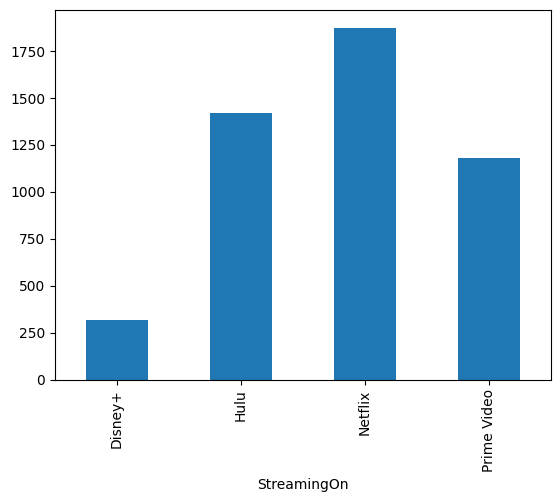

In [88]:
streaming_shows_both_ratings.groupby('StreamingOn')["Title"].count().plot(kind='bar')

Graficamos los scores utilizando Ploty express.

In [109]:
figure = []
figure.append(px.violin(streaming_shows_both_ratings, x = 'StreamingOn', y = 'IMDb_new', color='StreamingOn'))
figure.append(px.violin(streaming_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes_new', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)


for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=1560, height=800)
fig.show()

Elaboramos un gráfico de dispersión y coloreamos según la plataforma de streaming.

In [92]:
px.scatter(streaming_shows_both_ratings, x='IMDb_new', y='Rotten Tomatoes_new',color='StreamingOn')

## Facets

1. ¿Cuál es el show con mayor score en cada una de las plataformas?
2. ¿Cuál es el show con menos score en cada una de las plataformas?
3. ¿Cuál es el show más antiguo score en cada una de las plataformas?
4. ¿Qué me recomiendas ver?
5. ¿Qué puedo ver con mis hijos?

In [93]:
!pip install facets-overview

In [94]:

# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = streaming_shows_both_ratings.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="900"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

In [95]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames(
                                  [
                                    {'name': 'streaming_shows_both_ratings', 'table': streaming_shows_both_ratings},
                                    {'name': 'streaming_shows', 'table': streaming_shows}
                                  ]
                                )
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [96]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

---
Si llegaste hasta acá, ¡felicidades! Sígueme para más código: [David Regalado](https://beacons.ai/davidregalado)